### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.15.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [5]:
print(testY[0:5])

[9 2 1 1 6]


In [6]:
trainX = trainX.reshape(60000, 784)
print(trainX.shape)
testX = testX.reshape(10000, 784)
print(testX.shape)

(60000, 784)
(10000, 784)


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY)

In [8]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


In [9]:
trainX.shape

(60000, 784)

### Visualize the data

Plot first 10 images in the triaining set and their labels.

label for each of the below image: 9
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 2
label for each of the below image: 7
label for each of the below image: 2
label for each of the below image: 5
label for each of the below image: 5


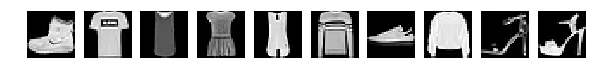

In [10]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(trainX[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(trainY[0:10][i])))
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.backend import backend

In [14]:
 ## hyperparameters
    iterations = 1
    learning_rate = 0.00001
    hidden_nodes = 256
    output_nodes = 10
    Lambda = 0
        
    model = Sequential()
    model.add(Dense(10, input_shape=(784,), activation='relu'))
    #model.add(Dense(hidden_nodes, activation='relu'))
    #model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
     # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

W1214 04:22:38.656003 139903836997504 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling __init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Execute the model using model.fit()

In [15]:
     model.fit(trainX, trainY, epochs=iterations, batch_size=1000, verbose= 1)

W1214 04:22:42.625261 139903836997504 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
60000/60000 [==============================] - 1s 10us/sample - loss: 7.1277 - acc: 0.0802


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
 ## hyperparameters
    iterations = 1
    learning_rate = 0.00001
    hidden_nodes = 256
    output_nodes = 10
    Lambda = 0
    keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
        
    model = Sequential()
    model.add(Dense(10, input_shape=(784,), activation='relu'))
    #model.add(Dense(hidden_nodes, activation='relu'))
    #model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
     # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

### Execute the model

In [18]:
model.fit(trainX, trainY, epochs=iterations, batch_size=1000, verbose= 1)

Train on 60000 samples
60000/60000 [==============================] - 0s 5us/sample - loss: 4.9711 - acc: 0.0633


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
 ## hyperparameters
    iterations = 1
    learning_rate = 0.001
    hidden_nodes = 256
    output_nodes = 10
    Lambda = 0
    keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
        
    model = Sequential()
    model.add(Dense(10, input_shape=(784,), activation='relu'))
    #model.add(Dense(hidden_nodes, activation='relu'))
    #model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
     # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [20]:
model.fit(trainX, trainY, epochs=iterations, batch_size=1000, verbose= 1)

Train on 60000 samples
60000/60000 [==============================] - 0s 5us/sample - loss: 4.1367 - acc: 0.1156


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
 ## hyperparameters
    iterations = 1
    learning_rate = 0.03
    #hidden_nodes = 256
    #output_nodes = 10
    Lambda = 0
    keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
        
    model = Sequential()
    model.add(Dense(100, input_shape=(784,), activation='sigmoid'))
    model.add(Dense(100, activation='sigmoid'))
    model.add(Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
     # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [30]:
model.fit(trainX, trainY, epochs=50, batch_size=1000, verbose= 1)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 9us/sample - loss: 0.8728 - acc: 0.7111
Epoch 2/50
60000/60000 [==============================] - 1s 9us/sample - loss: 0.7066 - acc: 0.7534
Epoch 3/50
60000/60000 [==============================] - 1s 8us/sample - loss: 0.6385 - acc: 0.7768
Epoch 4/50
60000/60000 [==============================] - 1s 9us/sample - loss: 0.6030 - acc: 0.7906
Epoch 5/50
60000/60000 [==============================] - 1s 9us/sample - loss: 0.6008 - acc: 0.7894
Epoch 6/50
60000/60000 [==============================] - 1s 8us/sample - loss: 0.5853 - acc: 0.7982
Epoch 7/50
60000/60000 [==============================] - 1s 8us/sample - loss: 0.5719 - acc: 0.8007
Epoch 8/50
60000/60000 [==============================] - 1s 9us/sample - loss: 0.5759 - acc: 0.8002
Epoch 9/50
60000/60000 [==============================] - 1s 9us/sample - loss: 0.5803 - acc: 0.7931
Epoch 10/50
60000/60000 [==============================] - 1s 9us/sa

## Review model

In [36]:
model.predict(testX)

array([[1.3898822e-06, 3.1319269e-06, 4.8807280e-05, ..., 5.4109406e-01,
        8.9007750e-04, 3.2827058e-01],
       [7.1465252e-03, 1.3284215e-03, 3.6344624e-01, ..., 6.5709944e-05,
        2.9612061e-02, 3.9999429e-04],
       [1.5272351e-03, 9.8636240e-01, 4.7621963e-04, ..., 1.1545977e-05,
        3.6055400e-05, 1.3693488e-04],
       ...,
       [5.5780154e-02, 3.3035097e-04, 2.3550440e-04, ..., 7.3728338e-02,
        7.9149652e-01, 7.2097615e-03],
       [1.5448320e-03, 9.8050416e-01, 3.0890072e-04, ..., 1.9049530e-05,
        2.0541567e-05, 1.3513849e-03],
       [1.6206366e-07, 3.4011559e-06, 7.1169416e-05, ..., 2.5467787e-02,
        4.5284591e-04, 3.5797106e-03]], dtype=float32)

### Run the model

In [32]:
score = model.evaluate(testX, testY,verbose=1)

10000/10000 [==============================] - 0s 28us/sample - loss: 0.6853 - acc: 0.7305
